# **PREDICTIVE MODELING FOR EARLY DETECTION OF CARDIOVASCULAR DISEASES USING RISK FACTORS AND CLINICAL FEATURES**

## **Libraries**

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
from tabulate import tabulate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier

## **Ignore Warning**

In [2]:
import warnings
warnings.filterwarnings('ignore')

## **Data Understanding**

### **Reading Dataset**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Einrafh/Predictive-Modeling-for-Early-Detection-of-Cardiovascular-Diseases/main/dataset/heart.csv?token=GHSAT0AAAAAACNYTWOOQFKBIQ5YH73KEKSMZPDACQQ')

### **Checking `df` Dataframe**

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### **Checking `df` Data Types**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.shape

(918, 12)

### **Define Target, Numerical, Categorical, and Boolean Columns**

In [10]:
target_column = 'HeartDisease'
numerical_column = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
categorical_column = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
boolean_column = 'FastingBS'

## **Data Cleaning**

### **Identifying and Handling Missing Values**

In [11]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### **Identifying and Handling Duplicate Rows**

In [12]:
df.duplicated().sum()

0

### **Identifying and Handling Outliers**

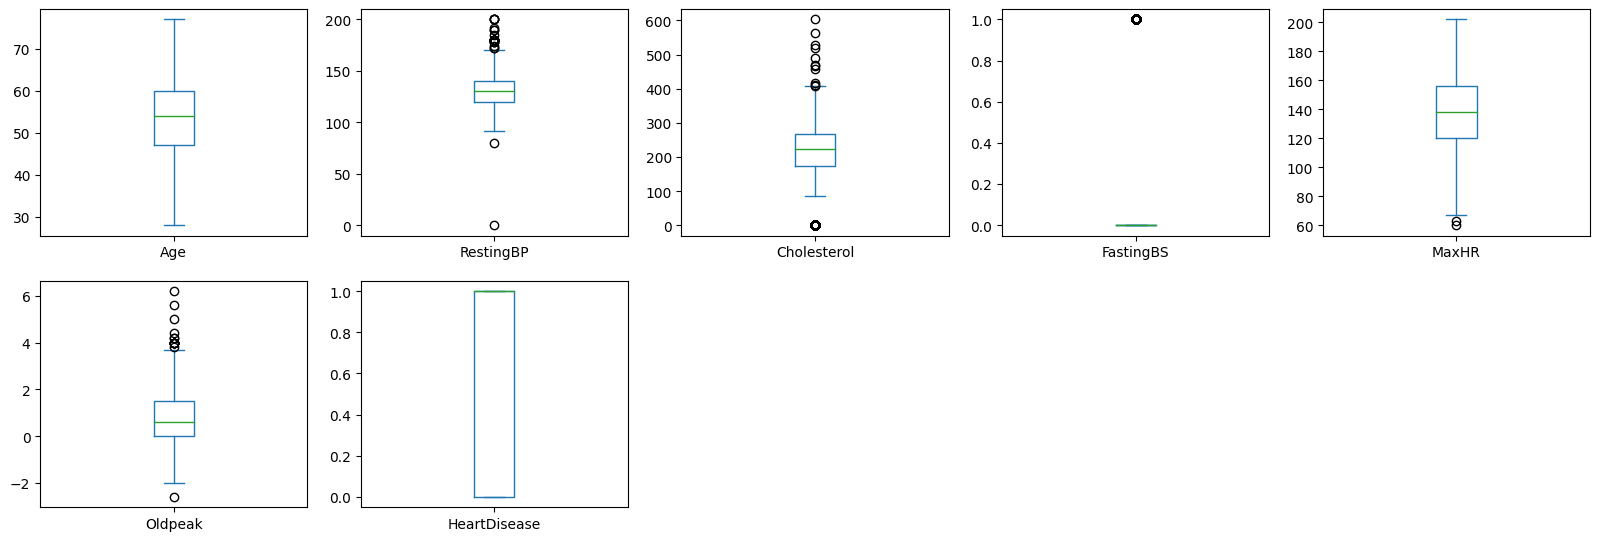

In [13]:
df.plot(kind='box', layout=(3, 5), figsize=(20, 10), subplots=True, sharex=False, sharey=False)
plt.show()

In [14]:
Q1 = df.drop([boolean_column, target_column] + categorical_column, axis=1).quantile(0.25)
Q3 = df.drop([boolean_column, target_column] + categorical_column, axis=1).quantile(0.75)
IQR = Q3 - Q1

clean_df = df.copy()
for column in clean_df.drop([boolean_column, target_column] + categorical_column, axis=1).columns:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    clean_df[column] = clean_df[column].clip(lower=lower_bound, upper=upper_bound)

clean_df.shape

(918, 12)

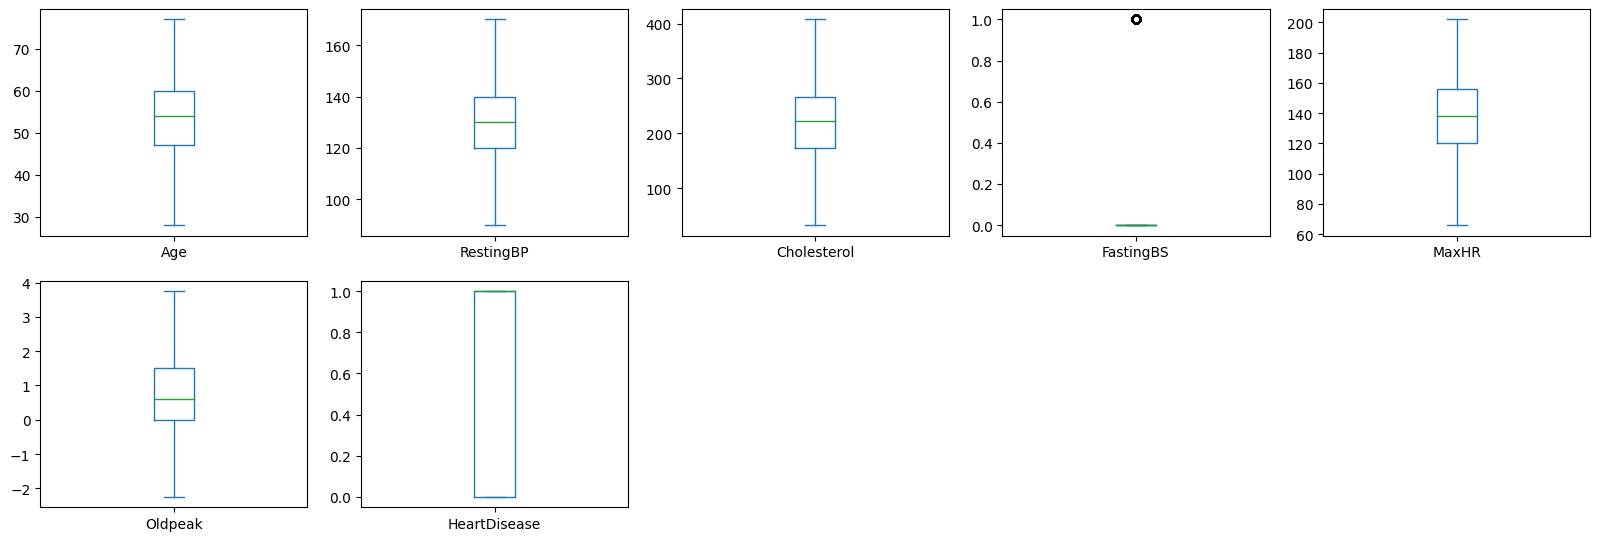

In [15]:
clean_df.plot(kind='box', layout=(3, 5), figsize=(20, 10), subplots=True, sharex=False, sharey=False)
plt.show()

## **Exploratory Data Analysis**

### **Univariate Analysis**

#### **Visualizing All Feature Distributions**

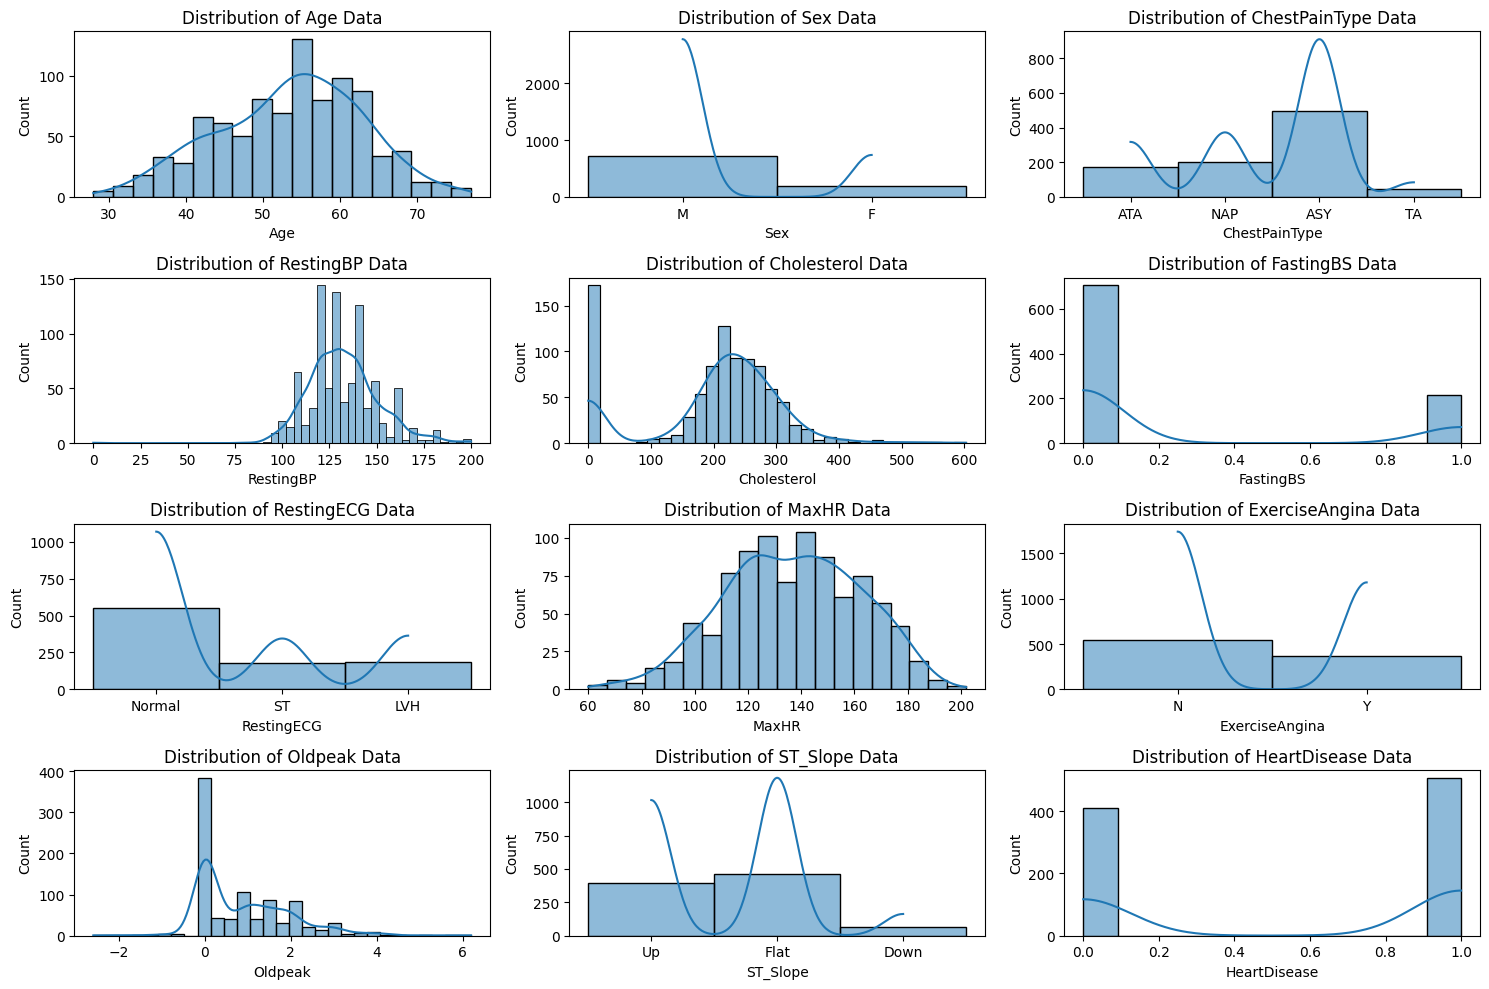

In [16]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns, 1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

#### **Visualizing Heart Disease Distribution**

In [17]:
fig = px.histogram(clean_df, x='HeartDisease', title='Distribusi HeartDisease')
fig.show()

#### **Visualizing Age Distribution**

In [18]:
fig = px.histogram(clean_df, x='Age', title='Distribusi Age')
fig.show()

#### **Visualizing Sex Distribution**

In [19]:
fig = px.histogram(clean_df, x='Sex', title='Distribusi Sex')
fig.show()

#### **Visualizing ChestPainType Distribution**

In [20]:
fig = px.histogram(clean_df, x='ChestPainType', title='Distribusi ChestPainType')
fig.show()

#### **Visualizing RestingBP Distribution**

In [21]:
fig = px.histogram(clean_df, x='RestingBP', title='Distribusi RestingBP')
fig.show()

#### **Visualizing Cholesterol Distribution**

In [22]:
fig = px.histogram(clean_df, x='Cholesterol', title='Distribusi Cholesterol')
fig.show()

#### **Visualizing FastingBS Distribution**

In [23]:
fig = px.histogram(clean_df, x='FastingBS', title='Distribusi FastingBS')
fig.show()

#### **Visualizing RestingECG Distribution**

In [24]:
fig = px.histogram(clean_df, x='RestingECG', title='Distribusi RestingECG')
fig.show()

#### **Visualizing MaxHR Distribution**

In [25]:
fig = px.histogram(clean_df, x='MaxHR', title='Distribusi MaxHR')
fig.show()

#### **Visualizing ExerciseAngina Distribution**

In [26]:
fig = px.histogram(clean_df, x='ExerciseAngina', title='Distribusi ExerciseAngina')
fig.show()

#### **Visualizing Oldpeak Distribution**

In [27]:
fig = px.histogram(clean_df, x='Oldpeak', title='Distribusi Oldpeak')
fig.show()

#### **Visualizing ST_Slope Distribution**

In [28]:
fig = px.histogram(clean_df, x='ST_Slope', title='Distribusi ST_Slope')
fig.show()

### **Bivariate Analysis**

In [29]:
bivariate_df = clean_df.copy()
bivariate_df['HeartDisease'] = bivariate_df['HeartDisease'].map({0: 'No', 1: 'Yes'})
bivariate_df['FastingBS'] = bivariate_df['FastingBS'].map({0: 'No', 1: 'Yes'})
bivariate_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,No,Normal,172,N,0.0,Up,No
1,49,F,NAP,160,180.0,No,Normal,156,N,1.0,Flat,Yes
2,37,M,ATA,130,283.0,No,ST,98,N,0.0,Up,No
3,48,F,ASY,138,214.0,No,Normal,108,Y,1.5,Flat,Yes
4,54,M,NAP,150,195.0,No,Normal,122,N,0.0,Up,No
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,No,Normal,132,N,1.2,Flat,Yes
914,68,M,ASY,144,193.0,Yes,Normal,141,N,3.4,Flat,Yes
915,57,M,ASY,130,131.0,No,Normal,115,Y,1.2,Flat,Yes
916,57,F,ATA,130,236.0,No,LVH,174,N,0.0,Flat,Yes


#### **Distribution of Age by Heart Disease**

In [30]:
fig1 = px.histogram(bivariate_df, x='Age', color='HeartDisease', marginal='box',
                    title='Histogram and Box Plot of Age by Heart Disease',
                    labels={'Age': 'Age', 'HeartDisease': 'Heart Disease'})

age_heart_disease = bivariate_df.groupby(['Age', 'HeartDisease']).size().reset_index(name='Count')

fig2 = px.line(age_heart_disease, x='Age', y='Count', color='HeartDisease',
               title='Distribution of Heart Disease by Age',
               labels={'Age': 'Age', 'Count': 'Count', 'HeartDisease': 'Heart Disease'})

fig1.show()
fig2.show()

#### **Distribution of Sex by Heart Disease**

In [31]:
data = bivariate_df.groupby(['HeartDisease', 'Sex']).size().reset_index(name='Count')

fig = px.bar(data, x='Sex', y='Count', color='HeartDisease', barmode='group',
             title='Distribution of Sex by HeartDisease',
             labels={'HeartDisease': 'Heart Disease', 'Count': 'Number of Cases'},
             color_discrete_map={'No': 'darkblue', 'Yes': 'yellow'}
             )

fig.show()

#### **Distribution of ChestPainType by Heart Disease**

In [32]:
data = bivariate_df.groupby(['HeartDisease', 'ChestPainType']).size().reset_index(name='Count')

fig = px.bar(data, x='ChestPainType', y='Count', color='HeartDisease', barmode='group',
             title='Distribution of ChestPainType by HeartDisease',
             labels={'HeartDisease': 'Heart Disease', 'Count': 'Number of Cases'},
             color_discrete_map={'No': 'darkblue', 'Yes': 'yellow'}
             )

fig.show()

#### **Distribution of RestingBP by Heart Disease**

In [33]:
fig1 = px.histogram(bivariate_df, x='RestingBP', color='HeartDisease', marginal='box',
                    title='Histogram and Box Plot of RestingBP by Heart Disease',
                    labels={'RestingBP': 'RestingBP', 'HeartDisease': 'Heart Disease'})

restingBP_heart_disease = bivariate_df.groupby(['RestingBP', 'HeartDisease']).size().reset_index(name='Count')

fig2 = px.line(restingBP_heart_disease, x='RestingBP', y='Count', color='HeartDisease',
               title='Distribution of Heart Disease by RestingBP',
               labels={'RestingBP': 'RestingBP', 'Count': 'Count', 'HeartDisease': 'Heart Disease'})

fig1.show()
fig2.show()

#### **Distribution of Cholesterol by Heart Disease**

In [34]:
fig1 = px.histogram(bivariate_df, x='Cholesterol', color='HeartDisease', marginal='box',
                    title='Histogram and Box Plot of Cholesterol by Heart Disease',
                    labels={'Cholesterol': 'Cholesterol', 'HeartDisease': 'Heart Disease'})

cholesterol_heart_disease = bivariate_df.groupby(['Cholesterol', 'HeartDisease']).size().reset_index(name='Count')

fig2 = px.line(cholesterol_heart_disease, x='Cholesterol', y='Count', color='HeartDisease',
               title='Distribution of Heart Disease by Cholesterol',
               labels={'Cholesterol': 'Cholesterol', 'Count': 'Count', 'HeartDisease': 'Heart Disease'})

fig1.show()
fig2.show()

#### **Distribution of FastingBS by Heart Disease**

In [35]:
data = bivariate_df.groupby(['HeartDisease', 'FastingBS']).size().reset_index(name='Count')

fig = px.bar(data, x='FastingBS', y='Count', color='HeartDisease', barmode='group',
             title='Distribution of FastingBS by HeartDisease',
             labels={'HeartDisease': 'Heart Disease', 'Count': 'Number of Cases'},
             color_discrete_map={'No': 'darkblue', 'Yes': 'yellow'}
             )

fig.show()

#### **Distribution of RestingECG by Heart Disease**

In [36]:
data = bivariate_df.groupby(['HeartDisease', 'RestingECG']).size().reset_index(name='Count')

fig = px.bar(data, x='RestingECG', y='Count', color='HeartDisease', barmode='group',
             title='Distribution of RestingECG by HeartDisease',
             labels={'HeartDisease': 'Heart Disease', 'Count': 'Number of Cases'},
             color_discrete_map={'No': 'darkblue', 'Yes': 'yellow'}
             )

fig.show()

#### **Distribution of MaxHR by Heart Disease**

In [37]:
fig1 = px.histogram(bivariate_df, x='MaxHR', color='HeartDisease', marginal='box',
                    title='Histogram and Box Plot of MaxHR by Heart Disease',
                    labels={'MaxHR': 'MaxHR', 'HeartDisease': 'Heart Disease'})

maxHR_heart_disease = bivariate_df.groupby(['MaxHR', 'HeartDisease']).size().reset_index(name='Count')

fig2 = px.line(maxHR_heart_disease, x='MaxHR', y='Count', color='HeartDisease',
               title='Distribution of Heart Disease by MaxHR',
               labels={'MaxHR': 'MaxHR', 'Count': 'Count', 'HeartDisease': 'Heart Disease'})

fig1.show()
fig2.show()

#### **Distribution of ExerciseAngina by Heart Disease**

In [38]:
data = bivariate_df.groupby(['HeartDisease', 'ExerciseAngina']).size().reset_index(name='Count')

fig = px.bar(data, x='ExerciseAngina', y='Count', color='HeartDisease', barmode='group',
             title='Distribution of ExerciseAngina by HeartDisease',
             labels={'HeartDisease': 'Heart Disease', 'Count': 'Number of Cases'},
             color_discrete_map={'No': 'darkblue', 'Yes': 'yellow'}
             )

fig.show()

#### **Distribution of Oldpeak by Heart Disease**

In [39]:
fig1 = px.histogram(bivariate_df, x='Oldpeak', color='HeartDisease', marginal='box',
                    title='Histogram and Box Plot of Oldpeak by Heart Disease',
                    labels={'Oldpeak': 'Oldpeak', 'HeartDisease': 'Heart Disease'})

oldpeak_heart_disease = bivariate_df.groupby(['Oldpeak', 'HeartDisease']).size().reset_index(name='Count')

fig2 = px.line(oldpeak_heart_disease, x='Oldpeak', y='Count', color='HeartDisease',
               title='Distribution of Heart Disease by Oldpeak',
               labels={'Oldpeak': 'Oldpeak', 'Count': 'Count', 'HeartDisease': 'Heart Disease'})

fig1.show()
fig2.show()

#### **Distribution of ST_Slope by Heart Disease**

In [40]:
data = bivariate_df.groupby(['HeartDisease', 'ST_Slope']).size().reset_index(name='Count')

fig = px.bar(data, x='ST_Slope', y='Count', color='HeartDisease', barmode='group',
             title='Distribution of ST_Slope by HeartDisease',
             labels={'HeartDisease': 'Heart Disease', 'Count': 'Number of Cases'},
             color_discrete_map={'No': 'darkblue', 'Yes': 'yellow'}
             )

fig.show()

### **Pairplot Analysis**

<Figure size 1500x1000 with 0 Axes>

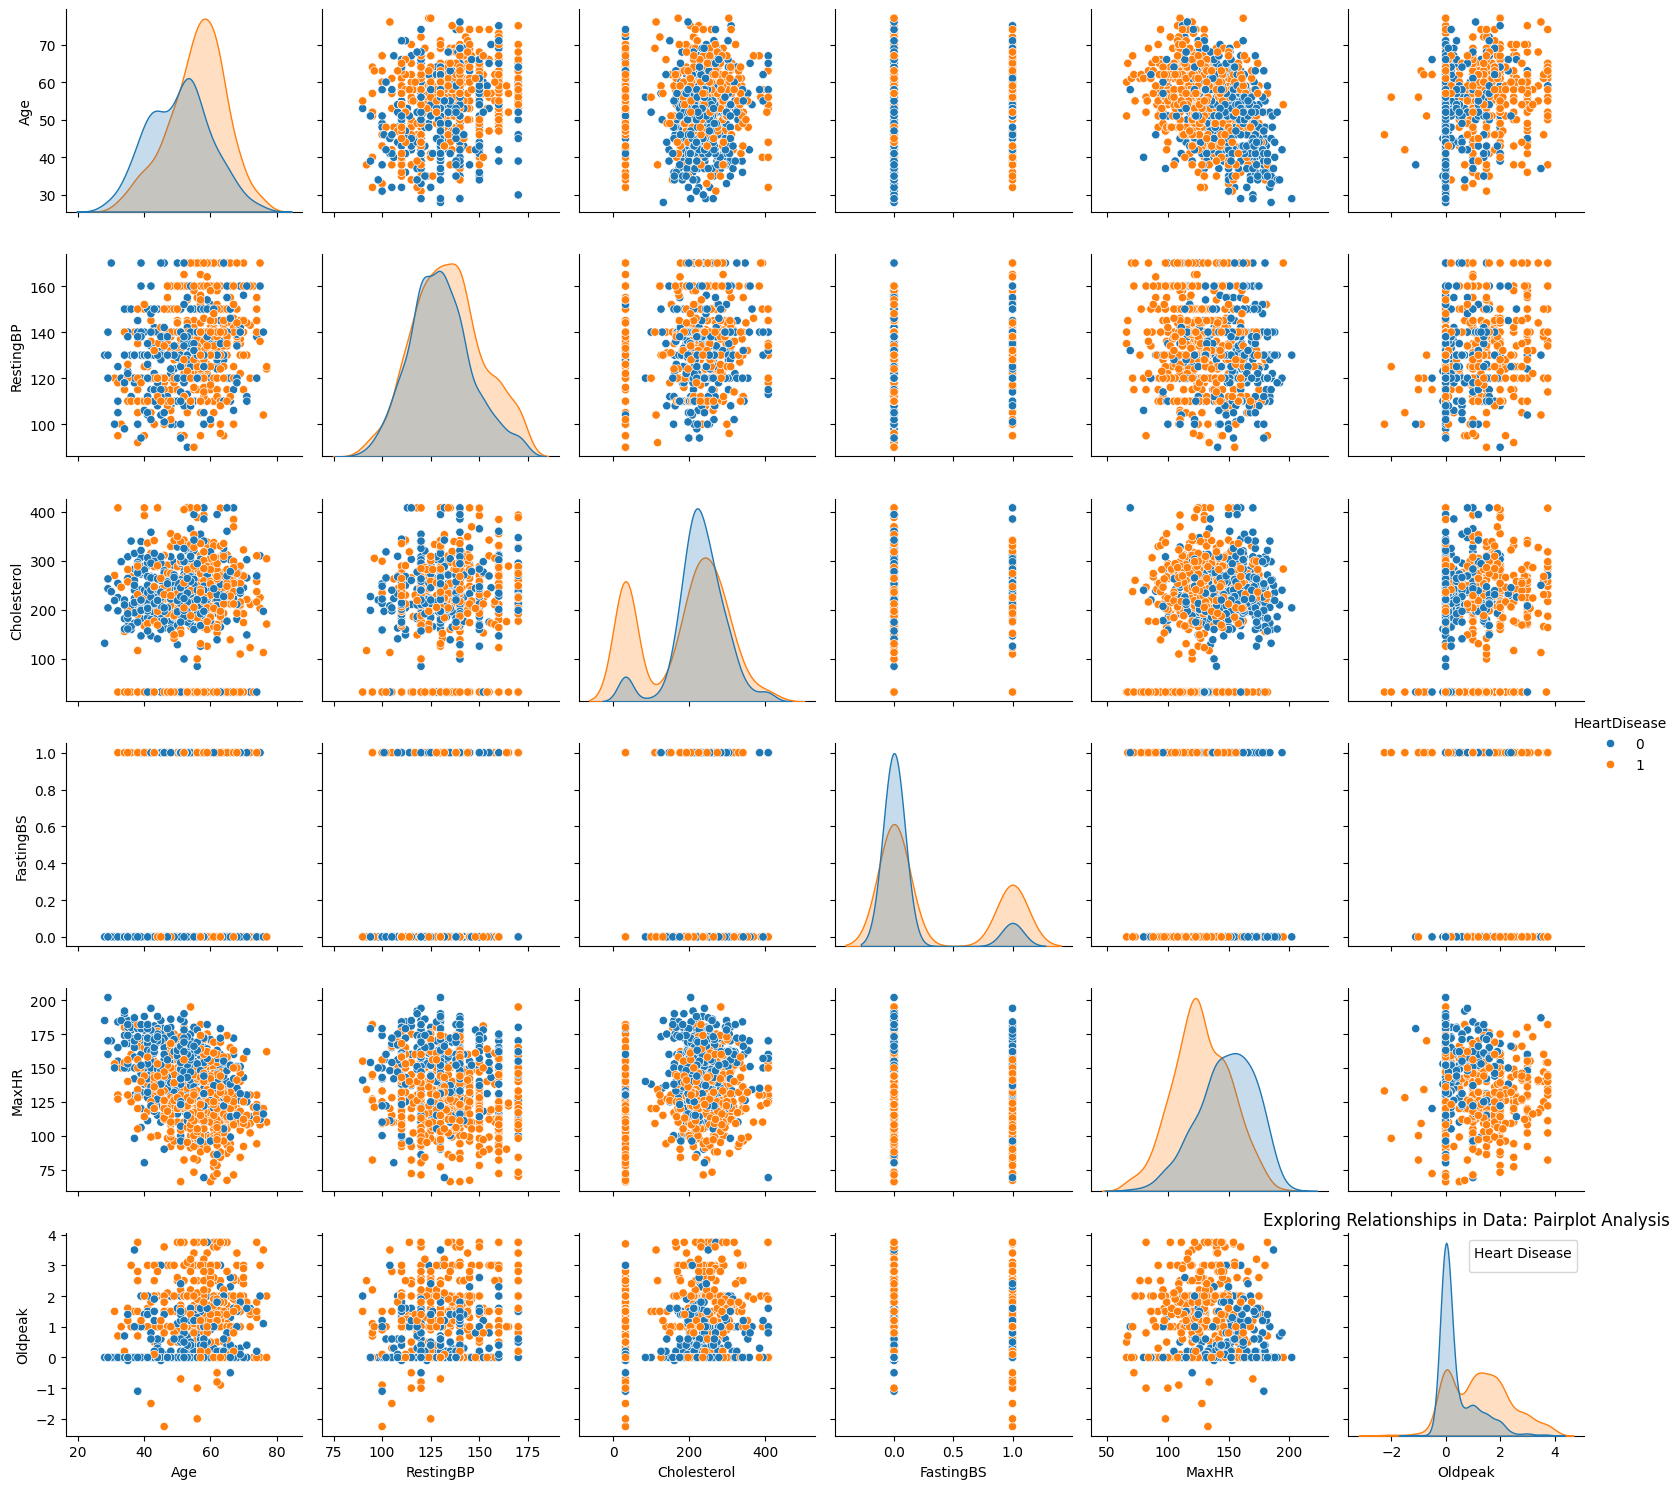

In [41]:
plt.figure(figsize=(15,10))
sns.pairplot(clean_df, hue='HeartDisease')
plt.title('Exploring Relationships in Data: Pairplot Analysis')
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.show()

### **Chi-Squared Test for Categorical Features**

In [42]:
def contingency_table(feature1, feature2):
    return pd.crosstab(df[feature1], df[feature2])

In [43]:
chi_values = []
p_values = []
table_data = []

for i in categorical_column:
    contingency_feature = contingency_table('HeartDisease', i)
    chi2, p, _, _ = stats.chi2_contingency(contingency_feature)
    table = tabulate(contingency_feature, headers='keys', tablefmt='pretty')
    table_data.append({
        'Feature': i,
        'Chi-Squared Value': chi2,
        'P-Value': p,
        'Contingency Table': table
    })
    chi_values.append(chi2)
    p_values.append(p)

print(tabulate(table_data, headers='keys', tablefmt='pretty'))

+----------------+--------------------+-----------------------+-----------------------------------------+
|    Feature     | Chi-Squared Value  |        P-Value        |            Contingency Table            |
+----------------+--------------------+-----------------------+-----------------------------------------+
|      Sex       | 84.14510134633775  | 4.597617450809164e-20 |      +--------------+-----+-----+       |
|                |                    |                       |      | HeartDisease |  F  |  M  |       |
|                |                    |                       |      +--------------+-----+-----+       |
|                |                    |                       |      |      0       | 143 | 267 |       |
|                |                    |                       |      |      1       | 50  | 458 |       |
|                |                    |                       |      +--------------+-----+-----+       |
| ChestPainType  | 268.06723902181767 | 8.0837

In [44]:
features = [item['Feature'] for item in table_data]
chi_values = [item['Chi-Squared Value'] for item in table_data]
p_values = [item['P-Value'] for item in table_data]

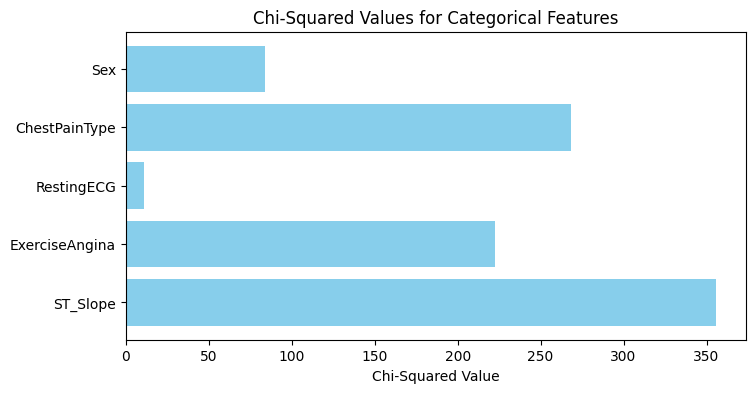

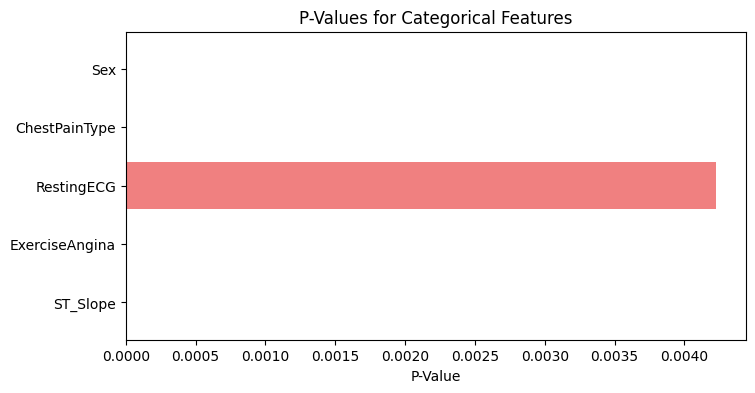

In [45]:
# Plot Chi-squared values
plt.figure(figsize=(8, 4))
plt.barh(features, chi_values, color='skyblue')
plt.xlabel('Chi-Squared Value')
plt.title('Chi-Squared Values for Categorical Features')
plt.gca().invert_yaxis()
plt.show()

# Plot P-values
plt.figure(figsize=(8, 4))
plt.barh(features, p_values, color='lightcoral')
plt.xlabel('P-Value')
plt.title('P-Values for Categorical Features')
plt.gca().invert_yaxis()
plt.show()

### **Correlation Analysis of Numeric Features with Heart Disease**

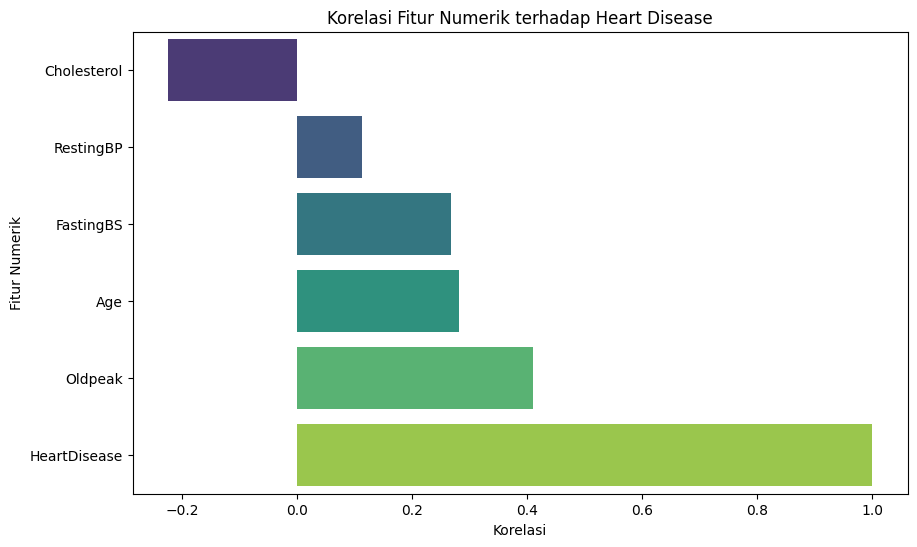

In [46]:
num_corr_df = clean_df.corr()['HeartDisease'].sort_values(ascending=True)[1:]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=num_corr_df.values, y=num_corr_df.index, ax=ax, palette='viridis')

ax.set_title('Korelasi Fitur Numerik terhadap Heart Disease')
ax.set_xlabel('Korelasi')
ax.set_ylabel('Fitur Numerik')

plt.show()

### **Correlation Analysis with One-Hot Encoding**

In [47]:
ohe_df = pd.get_dummies(clean_df)
ohe_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214.0,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195.0,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


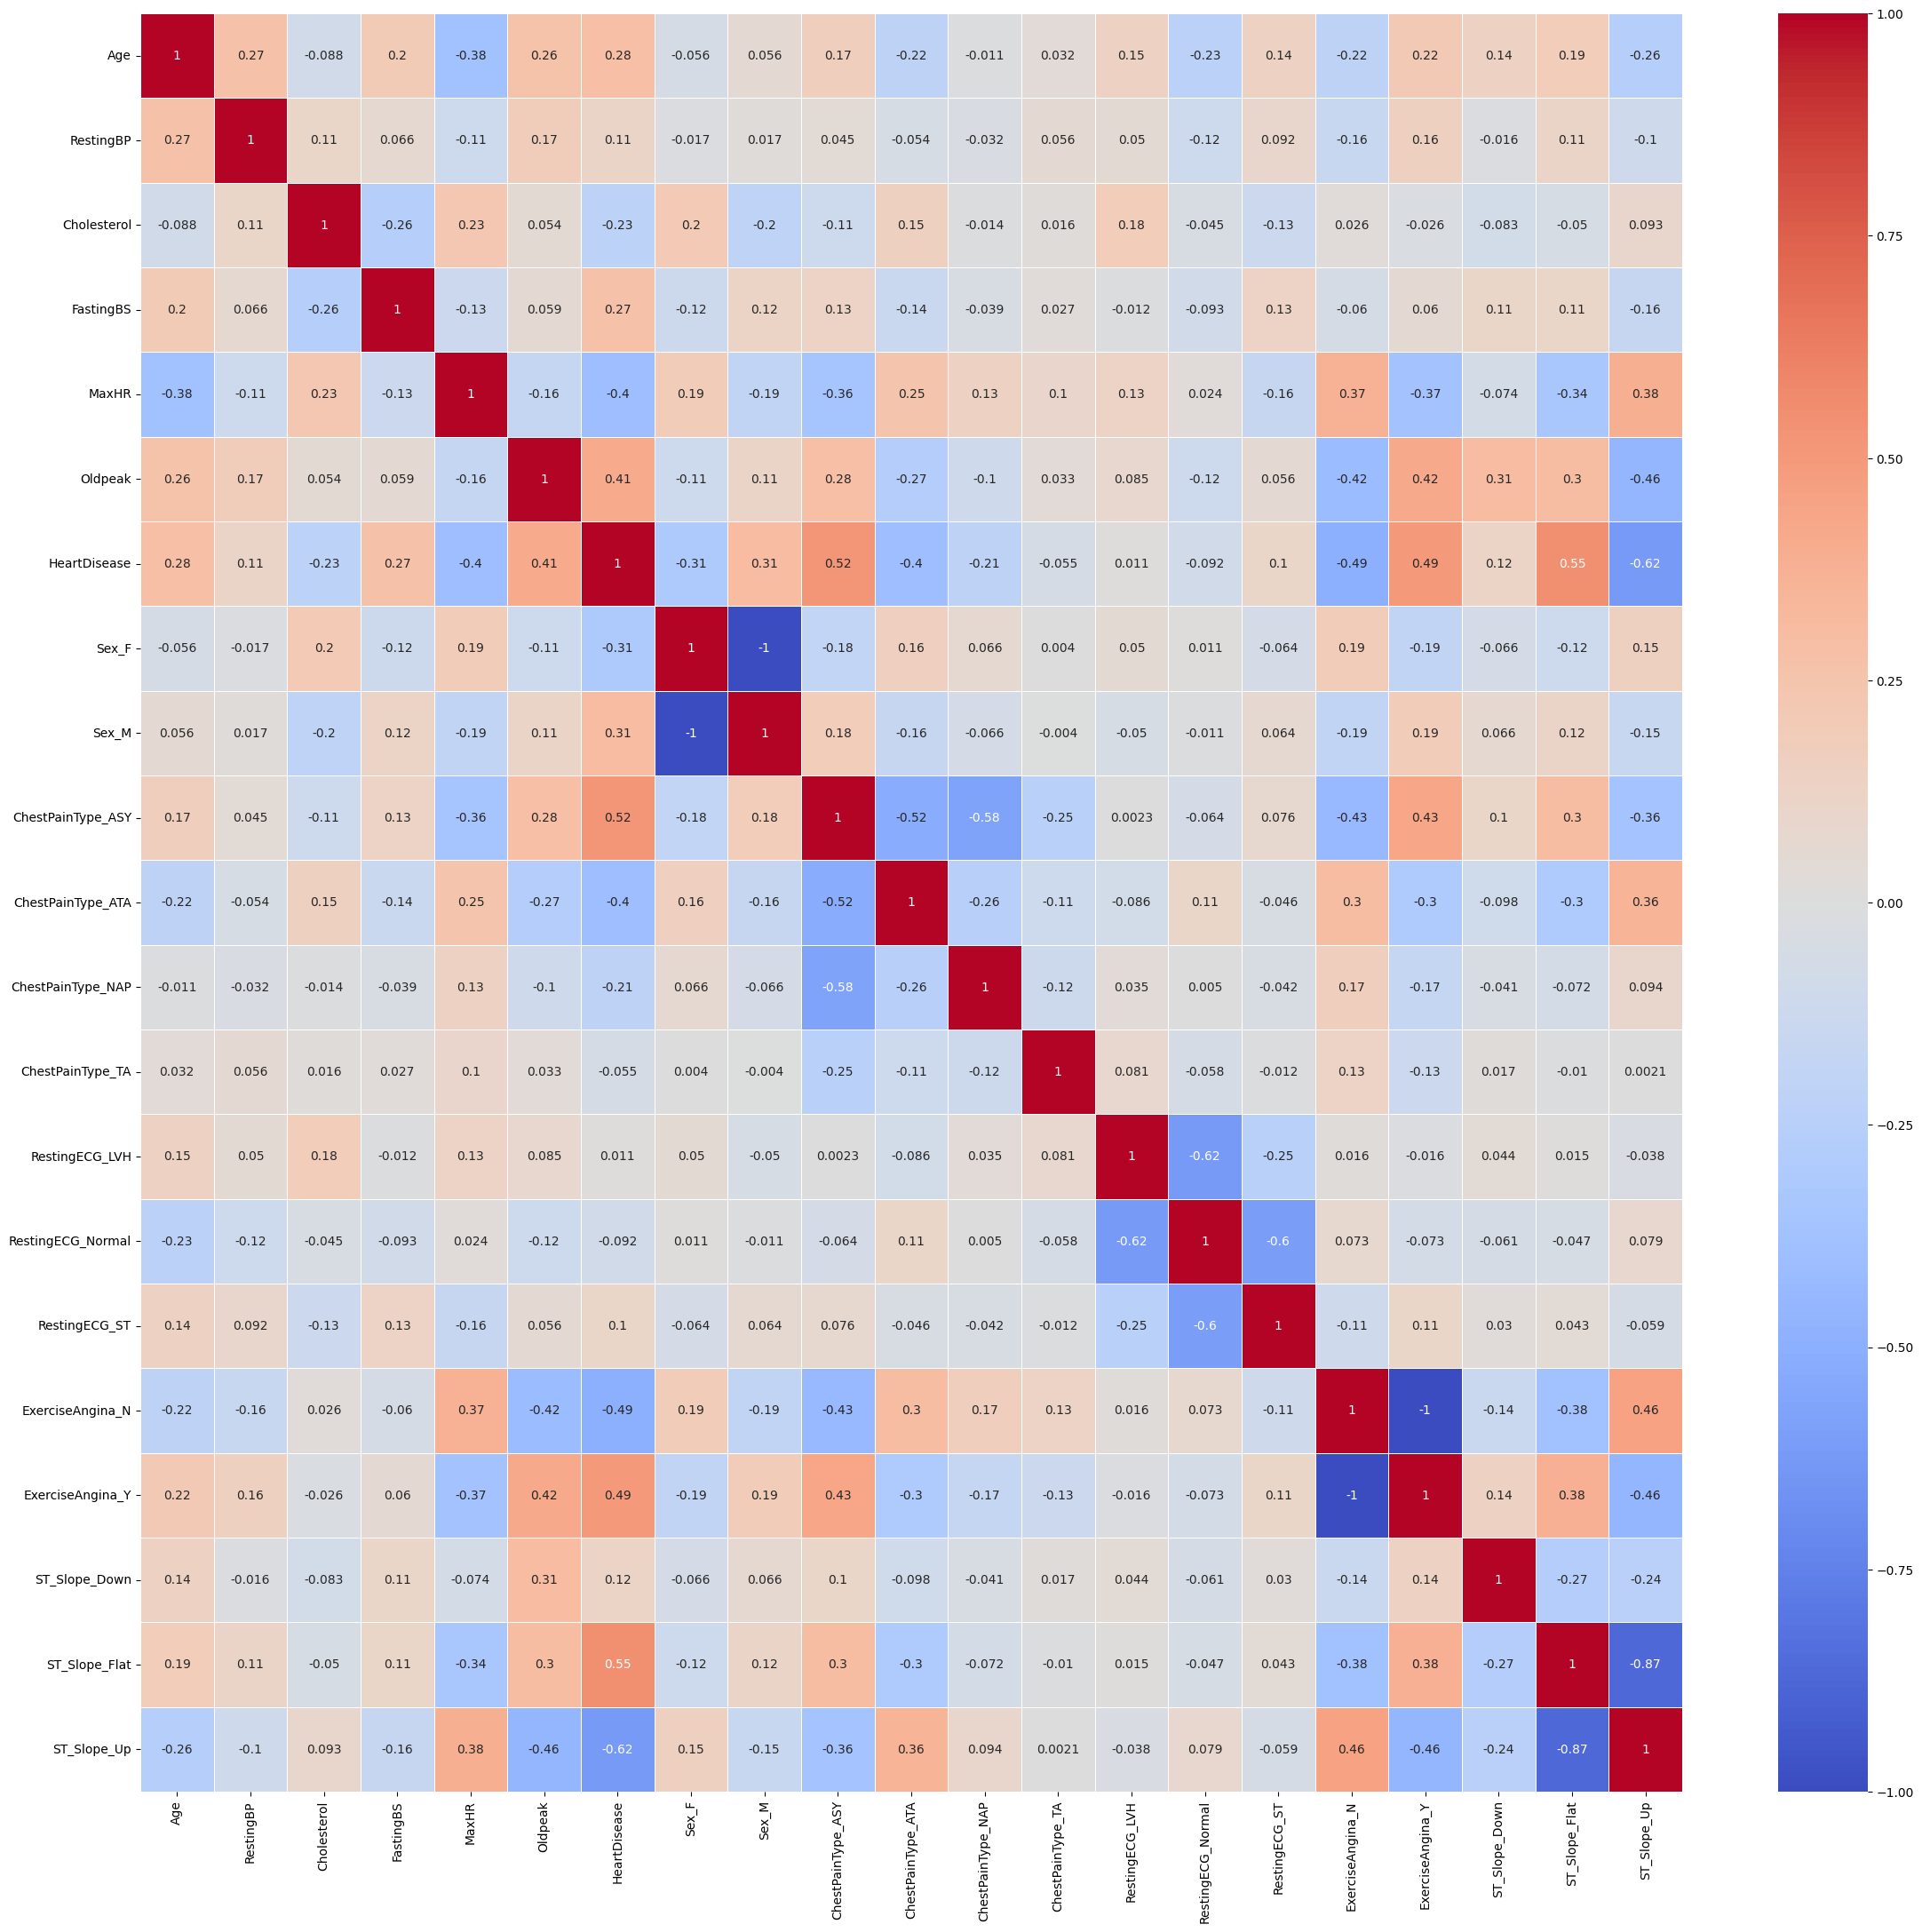

In [48]:
plt.figure(figsize=(28, 26))
sns.heatmap(ohe_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [49]:
fig = px.bar(x=ohe_df.corr()['HeartDisease'].sort_values(ascending=True).index,
             y=ohe_df.corr()['HeartDisease'].sort_values(ascending=True).values,
             color=ohe_df.corr()['HeartDisease'].sort_values(ascending=True).values)
fig.show()

### **Correlation Analysis Label Encoding**

In [50]:
def label_encoder(dataframe_series):
    if dataframe_series.dtype == 'object':
        return LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [51]:
le_df = clean_df.apply(lambda x: label_encoder(x))
le_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0


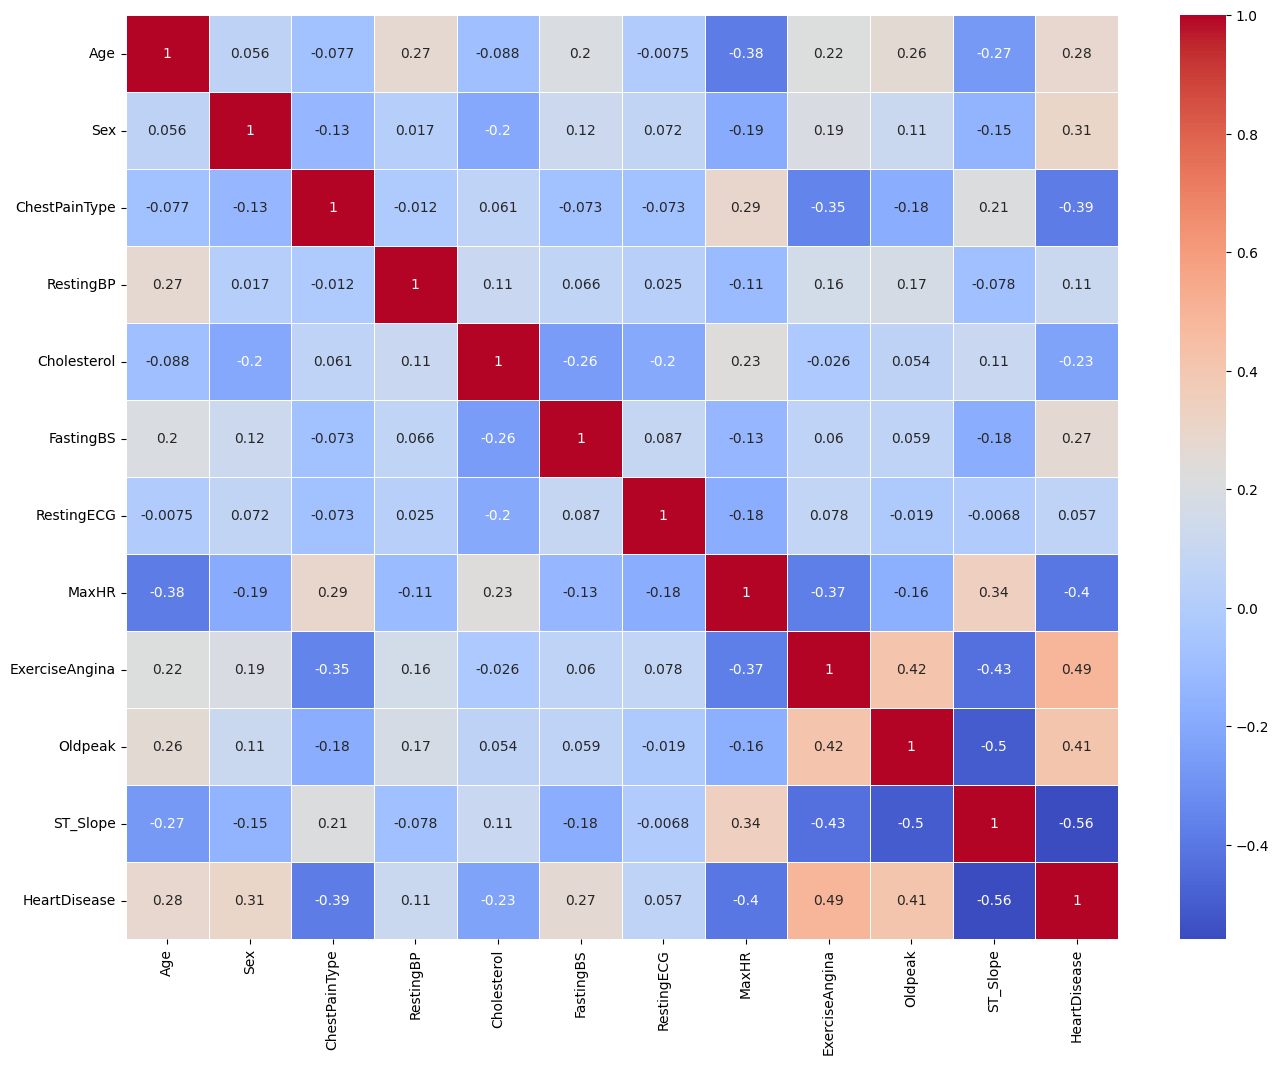

In [52]:
plt.figure(figsize=(16, 12))
sns.heatmap(le_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [53]:
fig = px.bar(le_df.corr()['HeartDisease'].sort_values(ascending=True), color='value')
fig.show()

### **Random Forest Feature Importance Analysis**

In [54]:
X = le_df.drop(['HeartDisease'], axis=1)
y = le_df['HeartDisease']
clf = RandomForestClassifier()
clf.fit(X, y)
feature_importance = clf.feature_importances_
feature_importance

array([0.07933106, 0.0328494 , 0.12799057, 0.07013497, 0.1047104 ,
       0.02753396, 0.02822604, 0.11067244, 0.08840812, 0.10528113,
       0.22486191])

In [55]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

fig = px.bar(feature_importance_df, x='Importance', y='Feature', orientation='h', title='Feature Importance in Random Forest Model', color='Importance')
fig.update_xaxes(title_text='Feature Importance')
fig.update_yaxes(title_text='Feature')
fig.show()

## **Model Development**

In [56]:
df_tree = clean_df.apply(LabelEncoder().fit_transform)
df_tree

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,40,147,0,1,97,0,10,2,0
1,21,0,2,54,40,0,1,81,0,20,1,1
2,9,1,1,30,141,0,2,24,0,10,2,0
3,20,0,0,38,72,0,1,33,1,25,1,1
4,26,1,2,48,53,0,1,47,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,13,122,0,1,57,0,22,1,1
914,40,1,0,44,51,1,1,66,0,42,1,1
915,29,1,0,30,9,0,1,40,1,22,1,1
916,29,0,1,30,94,0,0,99,0,10,1,1


In [57]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target_column)

### **Random Forest Classifier Evaluation with Stratified K-Fold**

In [58]:
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_tree,y=y)):

    X_train=df_tree.loc[trn_, feature_col_tree]
    y_train=df_tree.loc[trn_, target_column]

    X_valid=df_tree.loc[val_, feature_col_tree]
    y_valid=df_tree.loc[val_, target_column]

    clf=RandomForestClassifier(n_estimators=200, criterion='entropy')
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)

    print(f'The fold is : {fold} : ')
    print(classification_report(y_valid, y_pred))

    acc=roc_auc_score(y_valid, y_pred)
    acc_RandF.append(acc)

    print(f'The accuracy for {fold+1} : {acc}')

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        82
           1       0.91      0.86      0.88       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The accuracy for 1 : 0.8764945002391201
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        82
           1       0.92      0.76      0.83       102

    accuracy                           0.83       184
   macro avg       0.84      0.84      0.83       184
weighted avg       0.85      0.83      0.83       184

The accuracy for 2 : 0.8396700143472022
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.98      0.63      0.77        82
           1       0.77      0.99      0.87       102

    accuracy                           0.83  

### **XGBoost Classifier Evaluation with Stratified K-Fold**

In [59]:
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_tree,y=y)):

    X_train=df_tree.loc[trn_, feature_col_tree]
    y_train=df_tree.loc[trn_, target_column]

    X_valid=df_tree.loc[val_, feature_col_tree]
    y_valid=df_tree.loc[val_, target_column]

    clf=XGBClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)

    print(f'The fold is : {fold} : ')
    print(classification_report(y_valid,y_pred))

    acc=roc_auc_score(y_valid,y_pred)
    acc_XGB.append(acc)

    print(f'The accuracy for {fold+1} : {acc}')

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        82
           1       0.93      0.84      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184

The accuracy for 1 : 0.884983261597322
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        82
           1       0.92      0.81      0.86       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for 2 : 0.864179818268771
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.61      0.75        82
           1       0.76      0.98      0.85       102

    accuracy                           0.82    

In [60]:
df_nontree = pd.get_dummies(clean_df, columns=categorical_column, drop_first=False)
df_nontree

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214.0,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195.0,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193.0,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131.0,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236.0,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [61]:
y = df_nontree[target_column].values
df_nontree.drop('HeartDisease', axis=1, inplace=True)
df_nontree = pd.concat([df_nontree, df[target_column]], axis=1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289.0,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180.0,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283.0,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214.0,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195.0,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [62]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target_column)

### **Support Vector Machine (SVM) Classifier Evaluation with Stratified K-Fold**

In [63]:
acc_svm=[]
kf=model_selection.StratifiedKFold(n_splits=5)

for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target_column]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target_column]

    ro_scaler = MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=SVC(kernel='linear')
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f'The fold is : {fold} : ')
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm.append(acc)
    print(f'The accuracy for {fold+1} : {acc}')

    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        82
           1       0.92      0.81      0.86       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for 1 : 0.864179818268771
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.95      0.67      0.79        82
           1       0.79      0.97      0.87       102

    accuracy                           0.84   